In [1]:
#import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.path as path
import pandas as pd
import seaborn as sns
import os
import statsmodels.api as sm

In [2]:
# Specify the path where the CSV files are located
csv_folder = "C:/Users/DONKAMS/Downloads/Income-Inequality-Analysis-with-Quantitative-Modeling/data"

# List all CSV files in the specified folder
csv_files = [file for file in os.listdir(csv_folder) if file.endswith(".csv")]

# Create an empty list to store DataFrame names
dataframe_names = []

# Create a dictionary to store DataFrames
dataframes = {}

# Iterate through the CSV files and import them into pandas DataFrames
for file in csv_files:
    # Extract the filename without extension to use as the DataFrame name
    dataset_name = os.path.splitext(file)[0]

    # Import the current CSV file into a pandas DataFrame
    df = pd.read_csv(os.path.join(csv_folder, file))

    # Store the DataFrame in the dictionary with the specified name
    dataframes[dataset_name] = df

    # Store the DataFrame name in the list
    dataframe_names.append(dataset_name)

# Display the list of DataFrame names
print("DataFrame Names:", dataframe_names)

# Access a specific DataFrame from the dictionary
# For example, to access the DataFrame named "example_dataset":
# example_dataset_df = dataframes["example_dataset"]


DataFrame Names: ['A1 Descriptives', 'A1 Pivots', 'A2 Budget size and Target', 'A2 Ginis and FRD', 'A2 Pivot', 'A3 Pivot', 'A4 Budget size programs - Copy', 'A4 Budget size programs', 'A4 Pivot', 'A5 Decomposition', 'A5 Pivot', 'Datasets']


In [3]:
#Utilize the "A1 Descriptives" worksheet for initial descriptive statistics, focusing on variables such as year, region, and country.
df = dataframes["A1 Descriptives"]
# Display initial summary statistics
summary_statistics = df.describe()

# Display unique values in the 'year', 'region', and 'country' columns
unique_years = df['Year'].unique()
unique_regions = df['Region'].unique()
unique_countries = df['Country'].unique()

# Print the summary statistics and unique values
print("Summary Statistics:")
print(summary_statistics)

print("\nUnique Years:")
print(unique_years)

print("\nUnique Regions:")
print(unique_regions)

print("\nUnique Countries:")
print(unique_countries)


Summary Statistics:
              Year  Median equivalized income  Mean equivalized income  \
count   293.000000               2.930000e+02             2.930000e+02   
mean   2000.040956               1.233697e+06             1.473971e+06   
std      10.493558               4.126934e+06             4.872050e+06   
min    1967.000000               6.490000e+02             7.410000e+02   
25%    1994.000000               1.691100e+04             2.086900e+04   
50%    2004.000000               3.902000e+04             4.570100e+04   
75%    2010.000000               2.281730e+05             2.535280e+05   
max    2014.000000               2.923555e+07             3.303860e+07   

       # Observations \nPrimary\nIncome   # Obervations\nGross\nIncome  \
count                        293.000000                     293.000000   
mean                       18434.829352                   18387.522184   
std                        29381.973194                   29395.827962   
min              

<h1 align = 'center'> Subset Selection </h1>

In [51]:
#Choose a subset of countries based on the research objectives.
#Select a consistent range of years for analysis.
df = dataframes["A1 Descriptives"]
# Define the subset of countries you want to analyze
selected_countries = ['Canada', 'Australia', 'China', 'Austria', 'United States', 'United Kingdom', 'France', 'Germany', 'India', 'Brazil',]

# Filter the DataFrame to include only the selected countries
df_subset_countries = df[df['Country'].isin(selected_countries)]

# Define the range of years for analysis
start_year = 2000
end_year = 2014

# Filter the DataFrame to include only the selected range of years
df_subset_years = df_subset_countries[(df_subset_countries['Year'] >= start_year) & (df_subset_countries['Year'] <= end_year)]

# show the result as a dataframe in pandas
df_subset_years

,Year,Code,Region,Wave,Country,Median equivalized income,Mean equivalized income,"Gross, net or mixed",# Observations \nPrimary\nIncome,# Obervations\nGross\nIncome,# Observations\nDisposable\nIncome
0,2010,AU,Anglo-Saxon,Wave VIII,Australia,41996,49439,Gross,17968,17968,17968
1,2008,AU,Anglo-Saxon,Wave VII,Australia,40350,47267,Gross,9307,9307,9307
2,2003,AU,Anglo-Saxon,Wave VI,Australia,25581,29417,Gross,10131,10131,10131
3,2001,AU,Anglo-Saxon,Wave V,Australia,23842,27281,Gross,6739,6739,6739
8,2013,AT,EU15,Wave IX,Austria,25703,29039,Gross,5906,5906,5906
9,2010,AT,EU15,Wave VIII,Austria,24421,27363,Gross,6183,6183,6183
10,2007,AT,EU15,Wave VII,Austria,21917,24567,Gross,5705,5705,5705
11,2004,AT,EU15,Wave VI,Austria,20154,22556,Gross,5147,5147,5147
12,2000,AT,EU15,Wave V,Austria,241389,263197,Net,2333,2333,2333
23,2013,BR,BRICS,Wave IX,Brazil,13444,19145,Gross,110888,110888,110888


<h1 align = 'center'> Time Series Analysis </h1>

In [52]:
# Set up the panel data structure using the 'year' and 'country' columns
panel_data = df_subset_years.set_index(['Country', 'Year'])

# Use xtset-like functionality to define the panel structure
# This helps in informing the library about the panel structure for time series analysis
panel_data = panel_data.sort_index(level=['Country', 'Year'])

# Perform time series analysis using panel data methods, for example, fixed effects regression
# Replace 'dependent_variable' and 'independent_variable' with your actual variable names
model = sm.PanelOLS.from_formula('dependent_variable ~ independent_variable + EntityEffects', data=panel_data)
results = model.fit()

# Print the regression results
print(results.summary())

AttributeError: module 'statsmodels.api' has no attribute 'PanelOLS'

In [ ]:
from statsmodels.formula.api import PanelOLS

# Set up the panel data structure using the 'year' and 'country' columns
panel_data = df_subset_years.set_index(['Country', 'Year'])

# Use xtset-like functionality to define the panel structure
# This helps in informing the library about the panel structure for time series analysis
panel_data = panel_data.sort_index(level=['Country', 'Year'])

# Perform time series analysis using panel data methods, for example, fixed effects regression
# Replace 'dependent_variable' and 'independent_variable' with your actual variable names
model = PanelOLS.from_formula('dependent_variable ~ independent_variable + EntityEffects', data=panel_data)
results = model.fit()

# Print the regression results
print(results.summary())

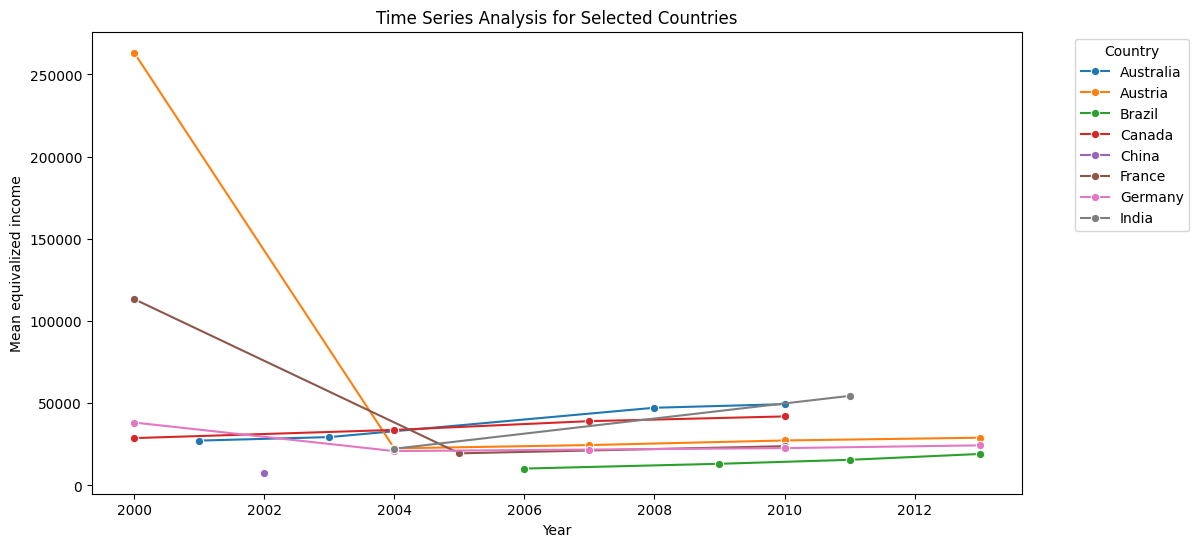

In [ ]:
# Visualize time series using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_subset_years, x='Year', y='Mean equivalized income', hue='Country', marker='o')
plt.title('Time Series Analysis for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Mean equivalized income')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

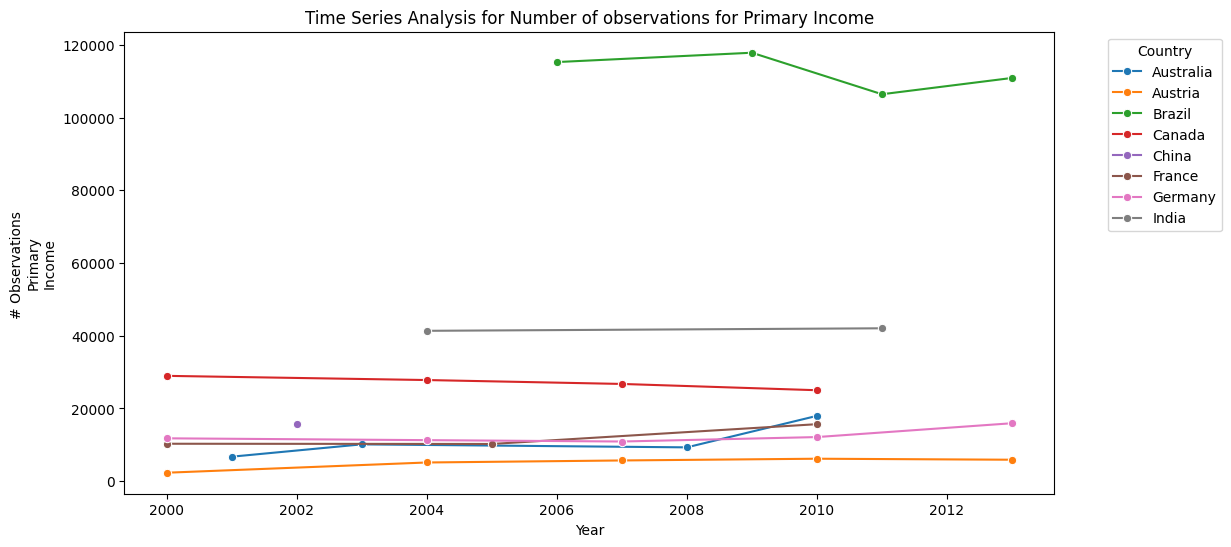

In [ ]:
# Visualize time series using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_subset_years, x='Year', y='# Observations \nPrimary\nIncome', hue='Country', marker='o')
plt.title('Time Series Analysis for Number of observations for Primary Income')
plt.xlabel('Year')
plt.ylabel('# Observations \nPrimary\nIncome')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

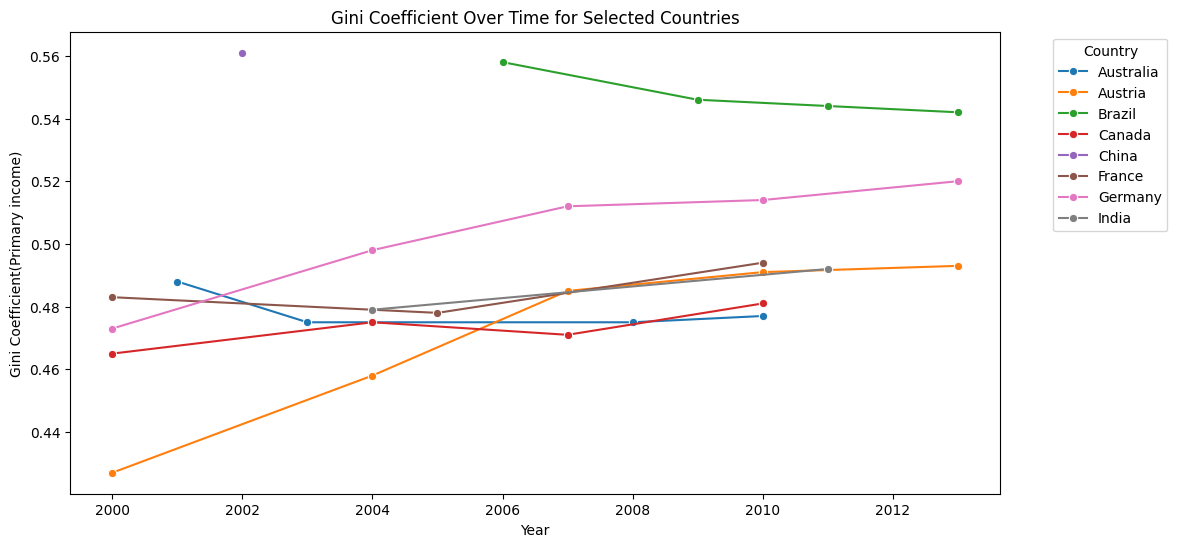

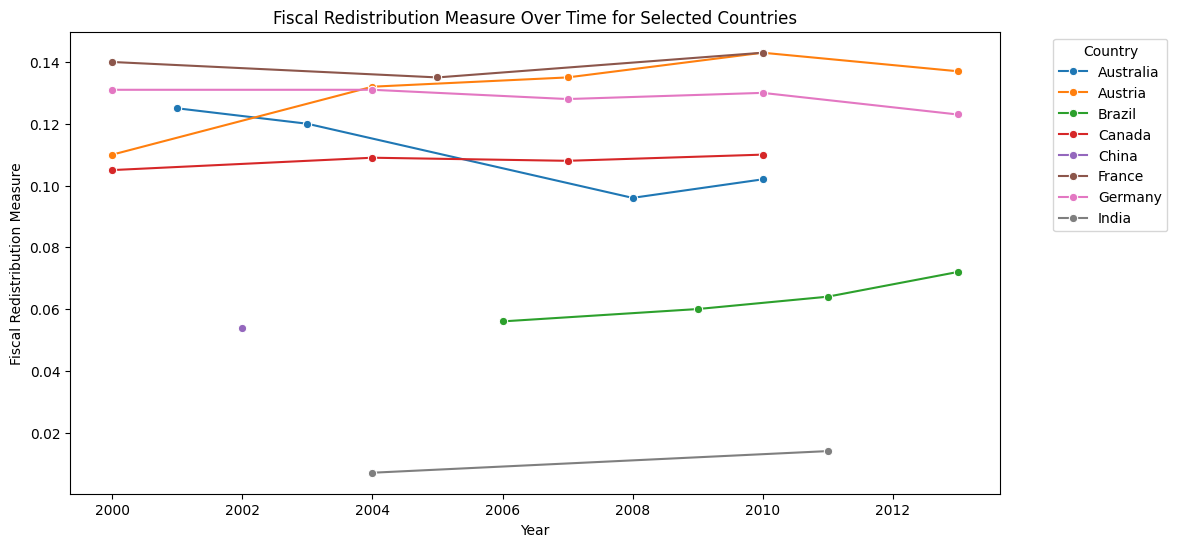

In [ ]:
# analyze Gini coefficients and overall fiscal redistribution measures within the chosen subset
# Assuming 'A2 Ginis and FRD' is the name of the worksheet containing the data
df_ginis_frd = dataframes["A2 Ginis and FRD"]


# Merge the Gini and fiscal redistribution data with the previously selected subset
df_merged = pd.merge(df_subset_years, df_ginis_frd, on=['Country', 'Year'])

# Visualize Gini coefficients over time for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_merged, x='Year', y='Primary\nIncome', hue='Country', marker='o')
plt.title('Gini Coefficient Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Gini Coefficient(Primary income)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualize overall fiscal redistribution measures over time for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_merged, x='Year', y='Total15', hue='Country', marker='o')
plt.title('Fiscal Redistribution Measure Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Fiscal Redistribution Measure')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
df_ginis_frd = dataframes["A2 Ginis and FRD"]
df_ginis_frd.head()

,Year,Region,Code,Wave,Country,LIS Dataset.3,Gross / net,Primary\nIncome,Gross\nIncome,Disposable\nIncome,...,Gross\nIncome13,Disposable\nIncome14,Total15,From\nTransfers16,From\nTaxes17,Total18,From\nTransfers19,From\nTaxes20,From\nTransfers21,From\nTaxes22
0,2010,Anglo-Saxon,AU,Wave VIII,Australia,NaN,Gross,0.477,0.368,0.330,...,0.347,0.313,0.102,0.068,0.034,0.25,0.16,0.08,0.67,0.33
1,2008,Anglo-Saxon,AU,Wave VII,Australia,NaN,Gross,0.475,0.376,0.333,...,0.359,0.321,0.096,0.058,0.038,0.23,0.14,0.09,0.60,0.40
2,2003,Anglo-Saxon,AU,Wave VI,Australia,NaN,Gross,0.475,0.360,0.312,...,0.344,0.301,0.120,0.077,0.043,0.28,0.18,0.10,0.64,0.36
3,2001,Anglo-Saxon,AU,Wave V,Australia,NaN,Gross,0.488,0.366,0.317,...,0.352,0.308,0.125,0.081,0.044,0.29,0.19,0.10,0.65,0.35
4,1995,Anglo-Saxon,AU,Wave IV,Australia,NaN,Gross,0.474,0.357,0.308,...,0.343,0.299,0.123,0.079,0.044,0.29,0.19,0.10,0.64,0.36


In [ ]:
# Merge the Gini and fiscal redistribution data with the previously selected subset
df_merged = pd.merge(df_subset_years, df_ginis_frd, on=['Country', 'Year'])

# Create a pivot table
pivot_table = pd.pivot_table(df_merged, values=['Primary\nIncome', 'Total15'],
                              index='Country', columns='Year', aggfunc='mean')

# Display the pivot table
print(pivot_table)

          Primary\nIncome                                                   \
Year                 2000   2001   2002   2003   2004   2005   2006   2007   
Country                                                                      
Australia             NaN  0.488    NaN  0.475    NaN    NaN    NaN    NaN   
Austria             0.427    NaN    NaN    NaN  0.458    NaN    NaN  0.485   
Brazil                NaN    NaN    NaN    NaN    NaN    NaN  0.558    NaN   
Canada              0.465    NaN    NaN    NaN  0.475    NaN    NaN  0.471   
China                 NaN    NaN  0.561    NaN    NaN    NaN    NaN    NaN   
France              0.483    NaN    NaN    NaN    NaN  0.478    NaN    NaN   
Germany             0.473    NaN    NaN    NaN  0.498    NaN    NaN  0.512   
India                 NaN    NaN    NaN    NaN  0.479    NaN    NaN    NaN   

                         ... Total15                                           \
Year        2008   2009  ...    2003   2004   2005   2006   

In [ ]:
df_a2_pivot = dataframes["A2 Pivot"]
# Replace the following column names with the actual ones in your DataFrame
# Replace the following column names with the actual ones in your DataFrame
index_columns = ['Row Labels']  # Assuming 'Row Labels' is the country column 
columns_to_aggregate = [
    'Gini P income', 'Gini G income', 'Gini D income',
    'Fiscal redistr (%)', 'From tranfers', 'From income taxes',
    'Gini P income WA', 'Gini G income WA', 'Gini D income WA',
    'Fiscal redistr (%) WA', 'From transfers WA', 'From income taxes WA'
]

# Create a pivot table
pivot_table_a2 = pd.pivot_table(df_a2_pivot, values=columns_to_aggregate,
                                index=index_columns, aggfunc='sum')

# Display the pivot table
print(pivot_table_a2)

#make it a dataframe pandas format
df_a2_pivot = pd.DataFrame(pivot_table_a2.to_records())
df_a2_pivot.head()


                    Fiscal redistr (%) Fiscal redistr (%) WA  \
Row Labels                                                     
Austria 2013                       44%                   33%   
Brazil 2011                        15%                   12%   
Brazil 2013                        17%                   14%   
Czech Republic 2013                44%                   32%   
Denmark 2013                       48%                   38%   
Estonia 2013                       35%                   26%   
Finland 2013                       47%                   36%   
Germany 2013                       44%                   29%   
Greece 2013                        41%                   32%   
Guatemala 2011                      3%                    2%   
Guatemala 2014                      8%                    7%   
Israel 2012                        25%                   22%   
Luxembourg 2013                    40%                   32%   
Mean                               29%  

,Row Labels,Fiscal redistr (%),Fiscal redistr (%) WA,From income taxes,From income taxes WA,From tranfers,From transfers WA,Gini D income,Gini D income WA,Gini G income,Gini G income WA,Gini P income,Gini P income WA
0,Austria 2013,44%,33%,9%,10%,35%,23%,0.279,0.280,0.322,0.320,0.493,0.417
1,Brazil 2011,15%,12%,3%,3%,12%,9%,0.460,0.454,0.476,0.470,0.544,0.518
2,Brazil 2013,17%,14%,3%,4%,14%,10%,0.450,0.444,0.468,0.463,0.542,0.516
3,Czech Republic 2013,44%,32%,8%,8%,36%,24%,0.258,0.255,0.293,0.285,0.457,0.375
4,Denmark 2013,48%,38%,9%,10%,39%,28%,0.249,0.250,0.291,0.290,0.476,0.402


In [ ]:
# Split the 'Row Labels' column on the space character and keep only the first part (the country name)
df_a2_pivot['Row Labels'] = df_a2_pivot['Row Labels'].str.split(' ').str[0]

# Display the first few rows of the DataFrame to verify the changes
df_a2_pivot.head()

,Row Labels,Fiscal redistr (%),Fiscal redistr (%) WA,From income taxes,From income taxes WA,From tranfers,From transfers WA,Gini D income,Gini D income WA,Gini G income,Gini G income WA,Gini P income,Gini P income WA
0,Austria,44%,33%,9%,10%,35%,23%,0.279,0.280,0.322,0.320,0.493,0.417
1,Brazil,15%,12%,3%,3%,12%,9%,0.460,0.454,0.476,0.470,0.544,0.518
2,Brazil,17%,14%,3%,4%,14%,10%,0.450,0.444,0.468,0.463,0.542,0.516
3,Czech,44%,32%,8%,8%,36%,24%,0.258,0.255,0.293,0.285,0.457,0.375
4,Denmark,48%,38%,9%,10%,39%,28%,0.249,0.250,0.291,0.290,0.476,0.402


In [ ]:
#filter to remain with the countries of interest
df_a2_pivot = df_a2_pivot[df_a2_pivot['Row Labels'].isin(selected_countries)]
df_a2_pivot.head()

,Row Labels,Fiscal redistr (%),Fiscal redistr (%) WA,From income taxes,From income taxes WA,From tranfers,From transfers WA,Gini D income,Gini D income WA,Gini G income,Gini G income WA,Gini P income,Gini P income WA
0,Austria,44%,33%,9%,10%,35%,23%,0.279,0.280,0.322,0.320,0.493,0.417
1,Brazil,15%,12%,3%,3%,12%,9%,0.460,0.454,0.476,0.470,0.544,0.518
2,Brazil,17%,14%,3%,4%,14%,10%,0.450,0.444,0.468,0.463,0.542,0.516
7,Germany,44%,29%,10%,11%,34%,18%,0.291,0.296,0.344,0.343,0.520,0.419


In [54]:
# Split the 'Row Labels' column on the space character and keep only the first part (the country name)
df_a2_budget_target['LIS Dataset'] = df_a2_budget_target['LIS Dataset'].str.split(' ').str[0]

# Display the first few rows of the DataFrame to verify the changes
df_a2_budget_target.head()

,Year,Code,Region,Wave,LIS Dataset,Gross / net,Budget size (transfers),Budget size (income taxes),Efficiency (transfers),Efficiency\n(income taxes)
0,2010,AU,Anglo-Saxon,Wave VIII,Australia,Gross,0.129,0.155,-0.318,-0.565
1,2008,AU,Anglo-Saxon,Wave VII,Australia,Gross,0.119,0.172,-0.321,-0.569
2,2003,AU,Anglo-Saxon,Wave VI,Australia,Gross,0.135,0.200,-0.336,-0.546
3,2001,AU,Anglo-Saxon,Wave V,Australia,Gross,0.140,0.190,-0.335,-0.561
4,1995,AU,Anglo-Saxon,Wave IV,Australia,Gross,0.137,0.201,-0.340,-0.543


In [55]:
# Replace it with the actual column name in your DataFrame
country_column = 'LIS Dataset'

# Columns for analysis
columns_to_analyze = ['Budget size (transfers)', 'Efficiency (transfers)']

# Group by country and calculate the mean for the selected columns
grouped_data = df_a2_budget_target.groupby(country_column)[columns_to_analyze].mean()

# Display the results
print(grouped_data)

             Budget size (transfers)  Efficiency (transfers)
LIS Dataset                                                 
Australia                   0.120125               -0.335500
Austria                     0.260000                0.043571
Belgium                     0.252333               -0.113667
Brazil                      0.205750                0.179500
Canada                      0.146167               -0.139000
China                       0.127000                0.324000
Colombia                    0.102750               -0.045750
Czech                       0.205714               -0.222571
Denmark                     0.221625               -0.200625
Dominican                   0.028000                0.026000
Egypt                       0.097000               -0.040000
Estonia                     0.190800               -0.042800
Finland                     0.240125               -0.074125
France                      0.262714                0.087286
Georgia                 

In [61]:
# List of countries of interest
countries_of_interest = ['Canada', 'Australia', 'China', 'Austria', 'India', 'Brazil']

# Filter the grouped data to include only the countries of interest
filtered_data = grouped_data.loc[countries_of_interest]

# Display the results
print(filtered_data)

             Budget size (transfers)  Efficiency (transfers)
LIS Dataset                                                 
Canada                      0.146167               -0.139000
Australia                   0.120125               -0.335500
China                       0.127000                0.324000
Austria                     0.260000                0.043571
India                       0.058000                0.079500
Brazil                      0.205750                0.179500


C:\Users\DONKAMS\AppData\Local\Temp\ipykernel_5060\865115188.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_data, x=filtered_data.index, y='Budget size (transfers)', palette=colors)


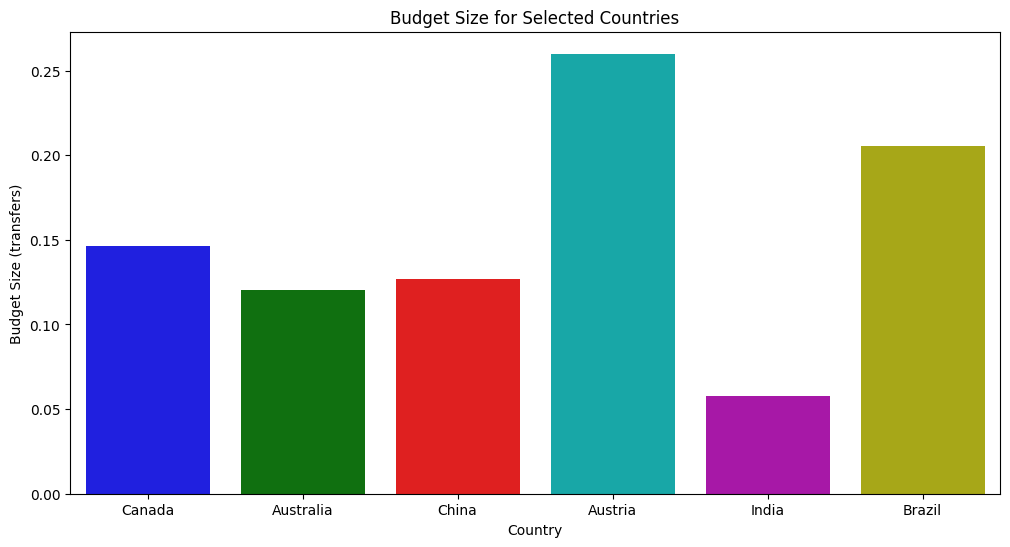

In [63]:
# List of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x=filtered_data.index, y='Budget size (transfers)', palette=colors)
plt.title('Budget Size for Selected Countries')
plt.xlabel('Country')
plt.ylabel('Budget Size (transfers)')
plt.show()

In [66]:
# Display the list of DataFrame names
print("DataFrame Names:", dataframe_names)

DataFrame Names: ['A1 Descriptives', 'A1 Pivots', 'A2 Budget size and Target', 'A2 Ginis and FRD', 'A2 Pivot', 'A3 Pivot', 'A4 Budget size programs', 'A4 Pivot', 'A5 Decomposition', 'A5 Pivot', 'Datasets']


In [87]:
A4_bugdet_size_programs = dataframes["A4 Budget size programs"]
A4_bugdet_size_programs.head()

,Year,Country,Region,Wave,LIS Dataset,Gross / net,Primary\nincome (a),Gross\nincome (b),Disposable\nincome (c),All social\nbenefits,...,All social\nbenefits.1,Old-age/ \nDisability/ \nSurvivor.1,Sickness.1,Family/\nChildren,Education.1,Unemployment.1,Housing.1,General/food/ medical\nassistance.1,Other transfers.1,Residual.1
0,2010,AU,Anglo-Saxon,Wave VIII,Australia,Gross,0.477,0.368,0.330,12.90%,...,100%,54%,0%,26%,0%,8%,2%,0%,10%,0%
1,2008,AU,Anglo-Saxon,Wave VII,Australia,Gross,0.475,0.376,0.333,11.90%,...,100%,55%,0%,29%,1%,6%,2%,0%,8%,0%
2,2003,AU,Anglo-Saxon,Wave VI,Australia,Gross,0.475,0.360,0.312,13.50%,...,100%,56%,0%,27%,NaN,10%,NaN,0%,6%,0%
3,2001,AU,Anglo-Saxon,Wave V,Australia,Gross,0.488,0.366,0.317,14.00%,...,100%,54%,0%,28%,NaN,10%,NaN,0%,7%,0%
4,1995,AU,Anglo-Saxon,Wave IV,Australia,Gross,0.474,0.357,0.308,13.70%,...,100%,53%,1%,23%,4%,14%,NaN,0%,5%,0%


In [88]:
#split the 'LIS Dataset' column on the space character and keep only the first part (the country name)
A4_bugdet_size_programs['LIS Dataset'] = A4_bugdet_size_programs['LIS Dataset'].str.split(' ').str[0]
A4_bugdet_size_programs.head()

,Year,Country,Region,Wave,LIS Dataset,Gross / net,Primary\nincome (a),Gross\nincome (b),Disposable\nincome (c),All social\nbenefits,...,All social\nbenefits.1,Old-age/ \nDisability/ \nSurvivor.1,Sickness.1,Family/\nChildren,Education.1,Unemployment.1,Housing.1,General/food/ medical\nassistance.1,Other transfers.1,Residual.1
0,2010,AU,Anglo-Saxon,Wave VIII,Australia,Gross,0.477,0.368,0.330,12.90%,...,100%,54%,0%,26%,0%,8%,2%,0%,10%,0%
1,2008,AU,Anglo-Saxon,Wave VII,Australia,Gross,0.475,0.376,0.333,11.90%,...,100%,55%,0%,29%,1%,6%,2%,0%,8%,0%
2,2003,AU,Anglo-Saxon,Wave VI,Australia,Gross,0.475,0.360,0.312,13.50%,...,100%,56%,0%,27%,NaN,10%,NaN,0%,6%,0%
3,2001,AU,Anglo-Saxon,Wave V,Australia,Gross,0.488,0.366,0.317,14.00%,...,100%,54%,0%,28%,NaN,10%,NaN,0%,7%,0%
4,1995,AU,Anglo-Saxon,Wave IV,Australia,Gross,0.474,0.357,0.308,13.70%,...,100%,53%,1%,23%,4%,14%,NaN,0%,5%,0%


In [91]:
df_social_programs = dataframes["A4 Budget size programs"]
df_social_programs.head()

,Year,Country,Region,Wave,LIS Dataset,Gross / net,Primary\nincome (a),Gross\nincome (b),Disposable\nincome (c),All social\nbenefits,...,All social\nbenefits.1,Old-age/ \nDisability/ \nSurvivor.1,Sickness.1,Family/\nChildren,Education.1,Unemployment.1,Housing.1,General/food/ medical\nassistance.1,Other transfers.1,Residual.1
0,2010,AU,Anglo-Saxon,Wave VIII,Australia,Gross,0.477,0.368,0.330,12.90%,...,100%,54%,0%,26%,0%,8%,2%,0%,10%,0%
1,2008,AU,Anglo-Saxon,Wave VII,Australia,Gross,0.475,0.376,0.333,11.90%,...,100%,55%,0%,29%,1%,6%,2%,0%,8%,0%
2,2003,AU,Anglo-Saxon,Wave VI,Australia,Gross,0.475,0.360,0.312,13.50%,...,100%,56%,0%,27%,NaN,10%,NaN,0%,6%,0%
3,2001,AU,Anglo-Saxon,Wave V,Australia,Gross,0.488,0.366,0.317,14.00%,...,100%,54%,0%,28%,NaN,10%,NaN,0%,7%,0%
4,1995,AU,Anglo-Saxon,Wave IV,Australia,Gross,0.474,0.357,0.308,13.70%,...,100%,53%,1%,23%,4%,14%,NaN,0%,5%,0%


In [92]:
#Remove the Country column
df_social_programs = df_social_programs.drop(columns=['Country'])
#rename the LIS Dataset column to Country
df_social_programs = df_social_programs.rename(columns={'LIS Dataset': 'Country'})
df_social_programs.head()

,Year,Region,Wave,Country,Gross / net,Primary\nincome (a),Gross\nincome (b),Disposable\nincome (c),All social\nbenefits,Old-age/ \nDisability/ \nSurvivor,...,All social\nbenefits.1,Old-age/ \nDisability/ \nSurvivor.1,Sickness.1,Family/\nChildren,Education.1,Unemployment.1,Housing.1,General/food/ medical\nassistance.1,Other transfers.1,Residual.1
0,2010,Anglo-Saxon,Wave VIII,Australia,Gross,0.477,0.368,0.330,12.90%,7.00%,...,100%,54%,0%,26%,0%,8%,2%,0%,10%,0%
1,2008,Anglo-Saxon,Wave VII,Australia,Gross,0.475,0.376,0.333,11.90%,6.60%,...,100%,55%,0%,29%,1%,6%,2%,0%,8%,0%
2,2003,Anglo-Saxon,Wave VI,Australia,Gross,0.475,0.360,0.312,13.50%,7.60%,...,100%,56%,0%,27%,NaN,10%,NaN,0%,6%,0%
3,2001,Anglo-Saxon,Wave V,Australia,Gross,0.488,0.366,0.317,14.00%,7.60%,...,100%,54%,0%,28%,NaN,10%,NaN,0%,7%,0%
4,1995,Anglo-Saxon,Wave IV,Australia,Gross,0.474,0.357,0.308,13.70%,7.30%,...,100%,53%,1%,23%,4%,14%,NaN,0%,5%,0%


In [93]:
#print unique values in the 'Country' column
unique_countries = df_social_programs['Country'].unique()
print(unique_countries)

['Australia' 'Austria' 'Belgium' 'Brazil' 'Canada' 'China' 'Colombia'
 'Czech' 'Denmark' 'Dominican' 'Egypt' 'Estonia' 'Finland' 'France'
 'Georgia' 'Germany' 'Greece' 'Guatemala' 'Hungary' 'Iceland' 'India'
 'Ireland' 'Israel' 'Italy' 'Japan' 'Luxembourg' 'Mexico' 'Netherlands'
 'Norway' 'Panama' 'Paraguay' 'Peru' 'Poland' 'Romania' 'Russia' 'Serbia'
 'Slovakia' 'Slovenia' 'South' 'Spain' 'Sweden' 'Switzerland' 'Taiwan'
 'United' 'Uruguay' nan]


In [100]:
# Assuming you have already defined a subset of countries and years
subset_countries = ['Canada', 'Australia', 'China', 'Austria', 'India', 'Brazil']
subset_years = [2000, 2005, 2010, 2014]
df_subset = df_social_programs[df_social_programs['Country'].isin(subset_countries)]
df_subset.head()

,Year,Region,Wave,Country,Gross / net,Primary\nincome (a),Gross\nincome (b),Disposable\nincome (c),All social\nbenefits,Old-age/ \nDisability/ \nSurvivor,...,All social\nbenefits.1,Old-age/ \nDisability/ \nSurvivor.1,Sickness.1,Family/\nChildren,Education.1,Unemployment.1,Housing.1,General/food/ medical\nassistance.1,Other transfers.1,Residual.1
0,2010,Anglo-Saxon,Wave VIII,Australia,Gross,0.477,0.368,0.330,12.90%,7.00%,...,100%,54%,0%,26%,0%,8%,2%,0%,10%,0%
1,2008,Anglo-Saxon,Wave VII,Australia,Gross,0.475,0.376,0.333,11.90%,6.60%,...,100%,55%,0%,29%,1%,6%,2%,0%,8%,0%
2,2003,Anglo-Saxon,Wave VI,Australia,Gross,0.475,0.360,0.312,13.50%,7.60%,...,100%,56%,0%,27%,NaN,10%,NaN,0%,6%,0%
3,2001,Anglo-Saxon,Wave V,Australia,Gross,0.488,0.366,0.317,14.00%,7.60%,...,100%,54%,0%,28%,NaN,10%,NaN,0%,7%,0%
4,1995,Anglo-Saxon,Wave IV,Australia,Gross,0.474,0.357,0.308,13.70%,7.30%,...,100%,53%,1%,23%,4%,14%,NaN,0%,5%,0%


In [ ]:
# Perform relevant statistical analyses based on your research questions

In [105]:
df_subset.head()

Region      Wave Gross / net  Primary\nincome (a)  \
Country   Year                                                           
Australia 1981  Anglo-Saxon    Wave I       Gross                0.402   
          1985  Anglo-Saxon   Wave II       Gross                0.434   
          1989  Anglo-Saxon  Wave III       Gross                0.435   
          1995  Anglo-Saxon   Wave IV       Gross                0.474   
          2001  Anglo-Saxon    Wave V       Gross                0.488   

                Gross\nincome (b)  Disposable\nincome (c)  \
Country   Year                                              
Australia 1981              0.327                   0.281   
          1985              0.346                   0.292   
          1989              0.353                   0.302   
          1995              0.357                   0.308   
          2001              0.366                   0.317   

               All social\nbenefits Old-age/ \nDisability/ \nSurvivor  \
Country   Year                                                          
Australia 1981                9.70%                             5.80%   
          1985               10.70%                             6.60%   
          1989                9.70%                             5.70%   
          1995               13.70%                             7.30%   
          2001               14.00%                             7.60%   

               Sickness Family/\n Children  ... All social\nbenefits.1  \
Country   Year                              ...                          
Australia 1981    0.20%              1.30%  ...                   100%   
          1985    0.20%              1.20%  ...                   100%   
          1989    0.20%              2.00%  ...                   100%   
          1995    0.10%              3.10%  ...                   100%   
          2001    0.00%              3.90%  ...                   100%   

               Old-age/ \nDisability/ \nSurvivor.1 Sickness.1  \
Country   Year                                                  
Australia 1981                                 60%         2%   
          1985                                 61%         2%   
          1989                                 58%         2%   
          1995                                 53%         1%   
          2001                                 54%         0%   

               Family/\nChildren Education.1 Unemployment.1 Housing.1  \
Country   Year                                                          
Australia 1981               13%          3%            11%       NaN   
          1985               11%          1%            13%       NaN   
          1989               20%          2%            11%       NaN   
          1995               23%          4%            14%       NaN   
          2001               28%         NaN            10%       NaN   

                General/food/ medical\nassistance.1 Other transfers.1  \
Country   Year                                                          
Australia 1981                                  NaN               11%   
          1985                                  NaN               12%   
          1989                                  NaN                6%   
          1995                                   0%                5%   
          2001                                   0%                7%   

               Residual.1  
Country   Year             
Australia 1981         0%  
          1985         0%  
          1989         0%  
          1995         0%  
          2001         0%  

[5 rows x 34 columns]

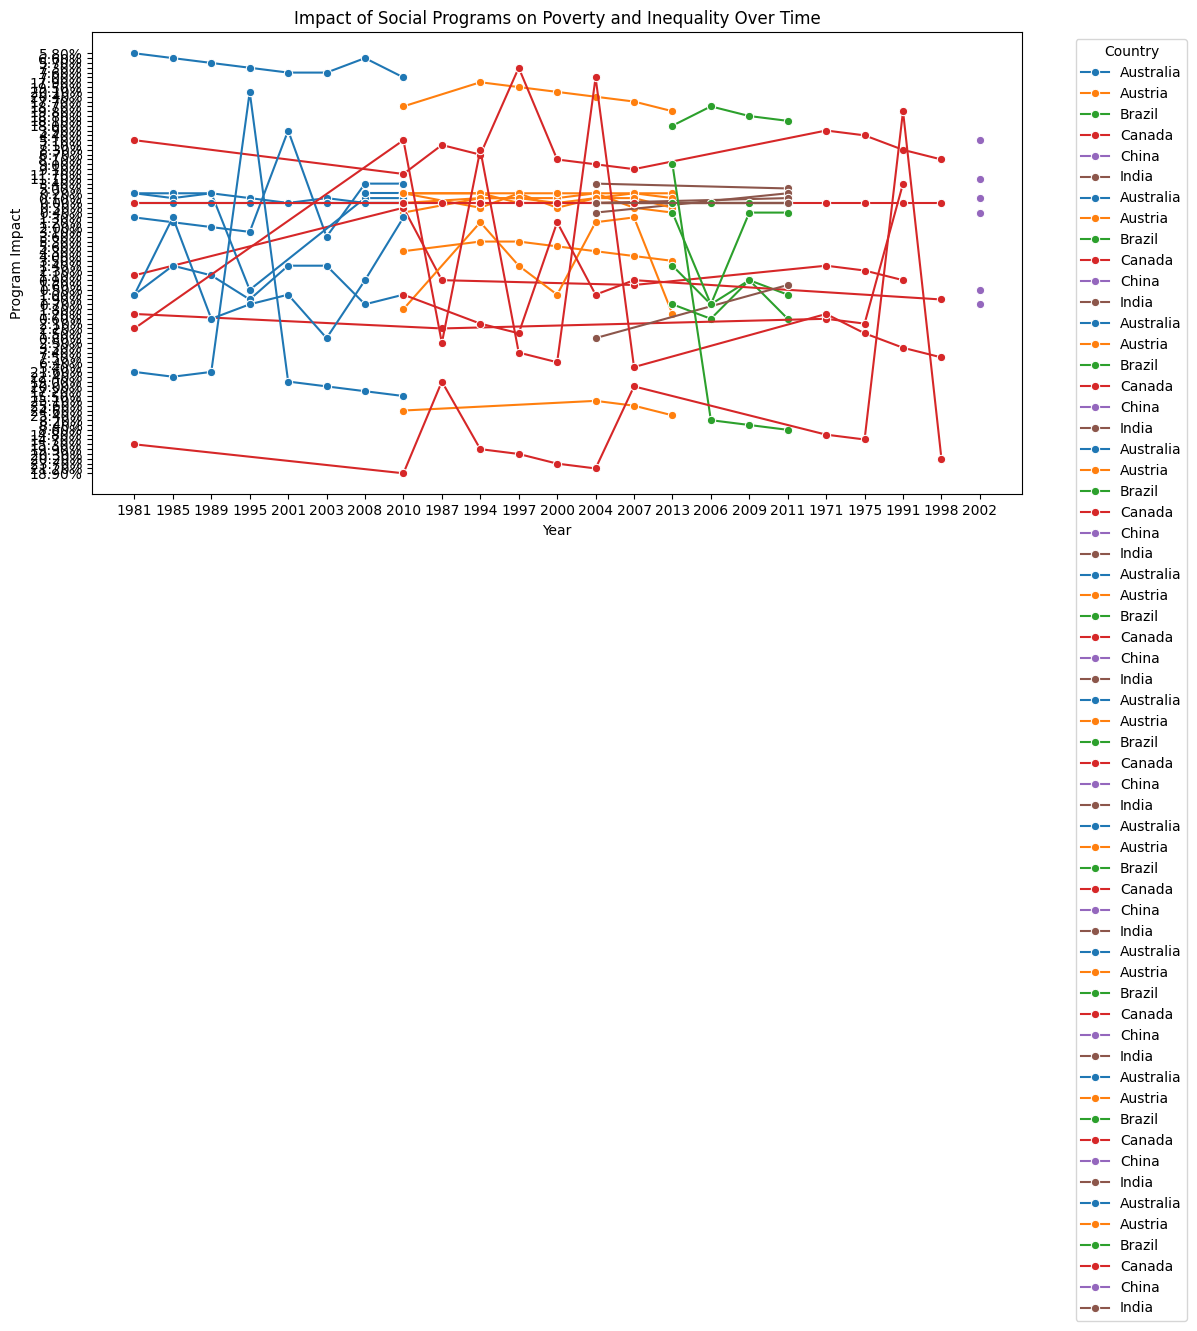

In [106]:
# Select relevant columns for the analysis
social_program_columns = ['Old-age/ \nDisability/ \nSurvivor', 'Sickness', 'Family/\n Children', 
                           'Education', 'Unemployment', 'Housing', 
                           'General/food/ medical\nassistance', 'Other transfers', 'Residual',
                           'Income taxes']
# Time Series Analysis: Use seaborn to visualize the impact of each social program over 
plt.figure(figsize=(12, 6))
for program in social_program_columns:
    sns.lineplot(data=df_subset, x='Year', y=program, hue='Country', marker='o')
plt.title('Impact of Social Programs on Poverty and Inequality Over Time')
plt.xlabel('Year')
plt.ylabel('Program Impact')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

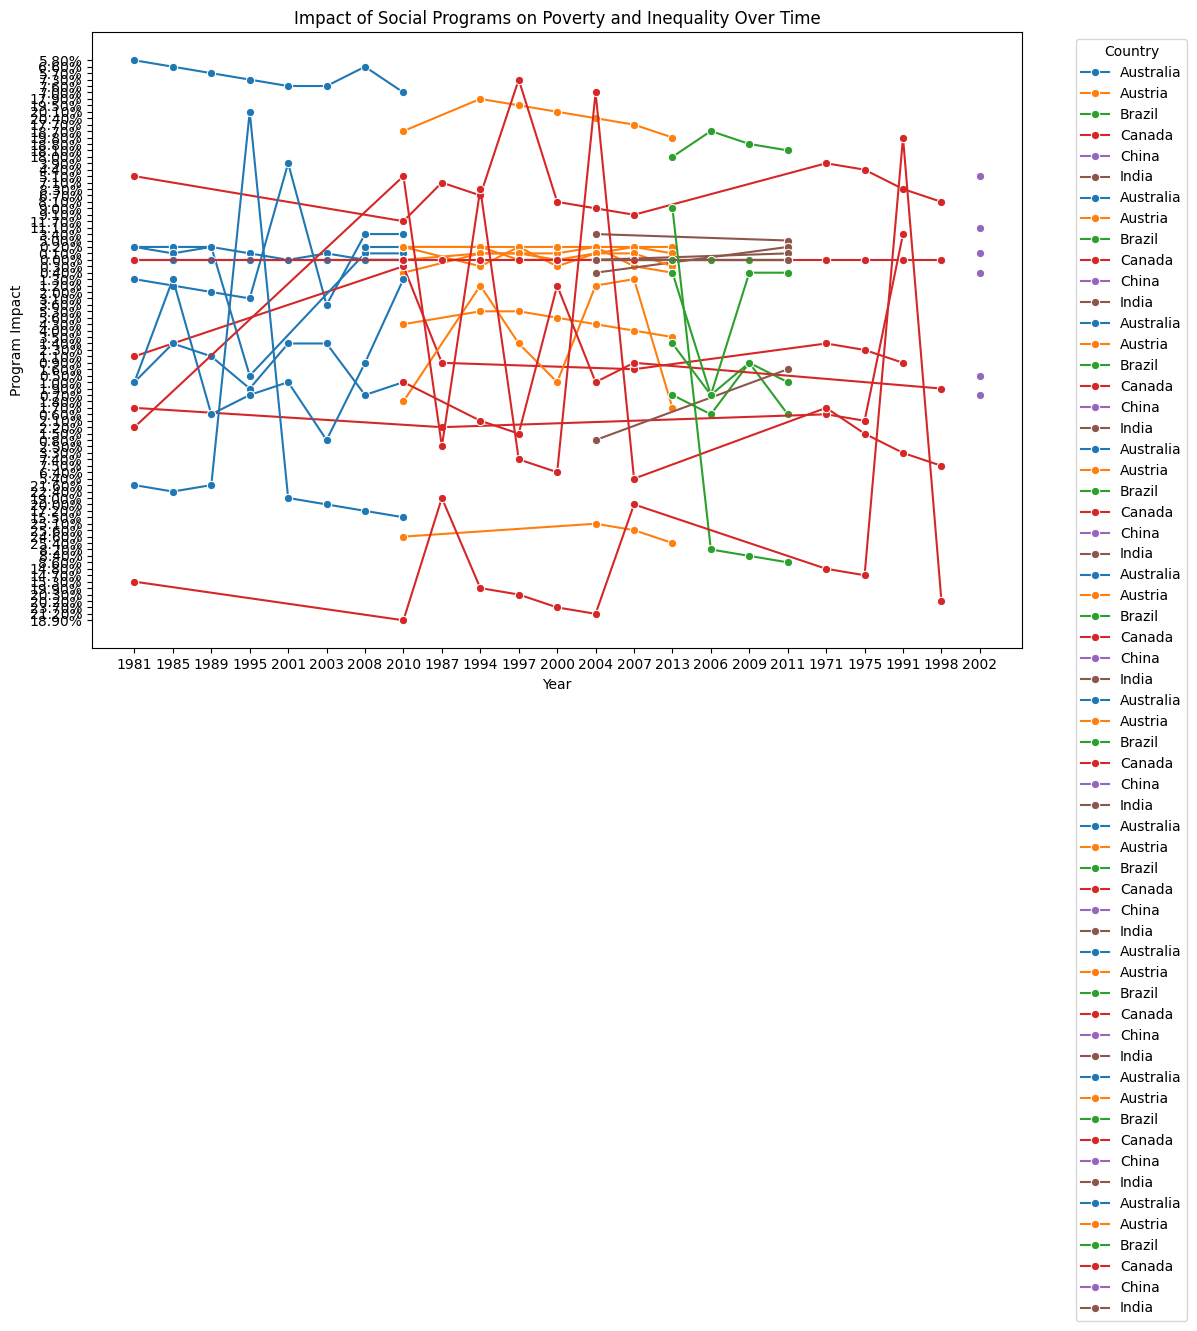

In [103]:
# Set up the panel data structure using the 'xtset' command
# Assuming 'Country' and 'Year' are the columns representing country and year
#df_subset = df_subset.set_index(['Country', 'Year'])


# Use xtset-like functionality to define the panel structure
# This helps in informing the library about the panel structure for time series analysis
df_subset = df_subset.sort_index(level=['Country', 'Year'])

# Select relevant columns for the analysis
social_program_columns = ['Old-age/ \nDisability/ \nSurvivor', 'Sickness', 'Family/\n Children', 
                           'Education', 'Unemployment', 'Housing', 
                           'General/food/ medical\nassistance', 'Other transfers', 'Residual',
                           'Income taxes']

# Time Series Analysis: Use seaborn to visualize the impact of each social program over time
plt.figure(figsize=(12, 8))
for program in social_program_columns:
    sns.lineplot(data=df_subset, x='Year', y=program, hue='Country', marker='o')

plt.title('Impact of Social Programs on Poverty and Inequality Over Time')
plt.xlabel('Year')
plt.ylabel('Program Impact')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()